In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_heart = pd.read_csv("heart.csv")

In [3]:
df_heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df_heart.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [5]:
df_heart.shape

(303, 14)

Text(0, 0.5, 'Count')

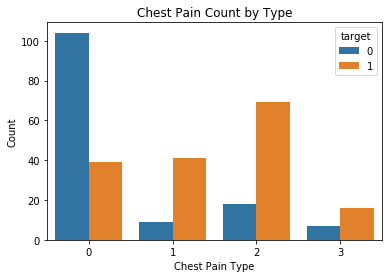

In [6]:
sns.countplot(data=df_heart,x='cp',hue='target')
plt.title("Chest Pain Count by Type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

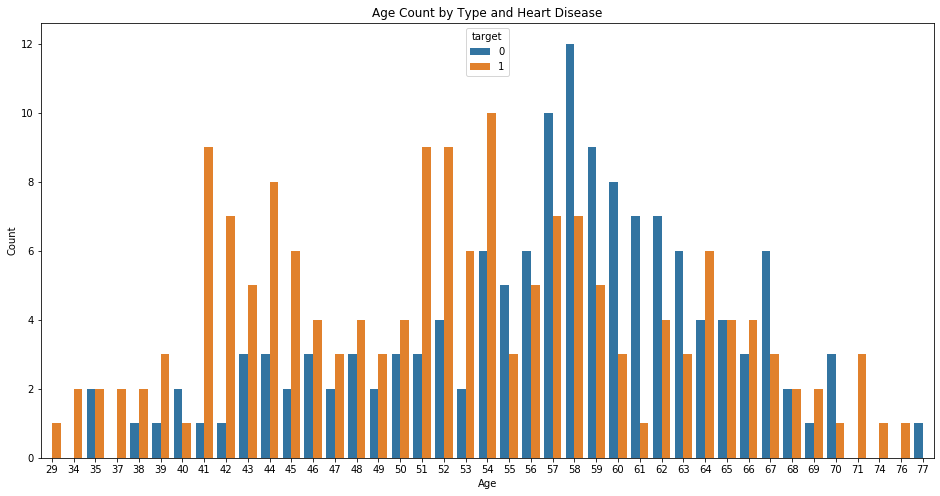

In [7]:
plt.figure(figsize=(16,8))
sns.countplot(data=df_heart,x='age',hue='target')
plt.title("Age Count by Type and Heart Disease")
plt.xlabel("Age")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

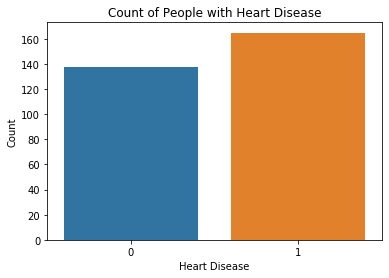

In [8]:
sns.countplot(data=df_heart,x='target')
plt.title("Count of People with Heart Disease")
plt.xlabel("Heart Disease")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

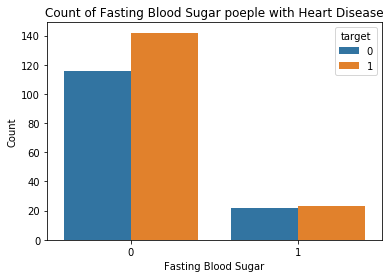

In [9]:
sns.countplot(data=df_heart,x='fbs',hue='target')
plt.title("Count of Fasting Blood Sugar poeple with Heart Disease")
plt.xlabel("Fasting Blood Sugar")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

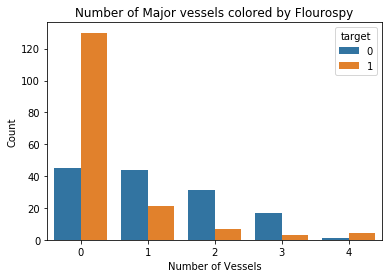

In [10]:
sns.countplot(data=df_heart,x='ca',hue='target')
plt.title("Number of Major vessels colored by Flourospy")
plt.xlabel("Number of Vessels")
plt.ylabel("Count")

In [11]:
df_heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [12]:
def impute_age(age):
    if(age<40):
        return 1
    elif ((age>=40) & (age<50)):
        return 2
    elif ((age>=50) & (age<60)):
        return 3
    elif ((age>=60) & (age<70)):
        return 4
    else:
        return 5

df_heart['age'] = df_heart.age.apply(impute_age)

df_heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,4,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,1,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,2,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,3,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,3,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [13]:
df_heart.cp = df_heart.cp.astype('category')
df_heart.fbs = df_heart.fbs.astype('category')
df_heart.restecg = df_heart.restecg.astype('category')
df_heart.thalach = df_heart.thalach.astype('category')
df_heart.exang = df_heart.exang.astype('category')
df_heart.slope = df_heart.slope.astype('category')
df_heart.ca = df_heart.ca.astype('category')
df_heart.thal = df_heart.thal.astype('category')

dummy_data = pd.get_dummies(data=df_heart,drop_first=True)

dummy_data.head()

,age,sex,trestbps,chol,oldpeak,target,cp_1,cp_2,cp_3,fbs_1,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,4,1,145,233,2.3,1,0,0,1,1,...,0,0,0,0,0,0,0,1,0,0
1,1,1,130,250,3.5,1,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
2,2,0,130,204,1.4,1,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
3,3,1,120,236,0.8,1,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
4,3,0,120,354,0.6,1,0,0,0,0,...,1,0,1,0,0,0,0,0,1,0


In [14]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
std_scaler.fit(dummy_data.drop('target',axis=1))

scaled_features = std_scaler.transform(dummy_data.drop('target',axis=1))

In [15]:
colms = dummy_data.columns.delete(5)
X = pd.DataFrame(scaled_features,columns=colms)
y = dummy_data['target']

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)

In [17]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()

dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [18]:
y_pred = dtree.predict(X_test)

In [19]:
from sklearn.metrics import confusion_matrix,classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.77      0.65      0.70        31
           1       0.69      0.80      0.74        30

    accuracy                           0.72        61
   macro avg       0.73      0.72      0.72        61
weighted avg       0.73      0.72      0.72        61



In [20]:
print(confusion_matrix(y_test,y_pred))

[[20 11]
 [ 6 24]]


In [21]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [22]:
rfc_y_pred = rfc.predict(X_test)

In [23]:
print(classification_report(y_test,rfc_y_pred))

              precision    recall  f1-score   support

           0       0.89      0.77      0.83        31
           1       0.79      0.90      0.84        30

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61



In [24]:
print(confusion_matrix(y_test,rfc_y_pred))

[[24  7]
 [ 3 27]]


In [25]:
from sklearn.linear_model import LogisticRegression

lr_regression = LogisticRegression()
lr_regression.fit(X_train,y_train)

C:\Users\Abhijeet\Anaconda3\envs\datascience\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [26]:
lr_y_pred = lr_regression.predict(X_test)

In [27]:
print(classification_report(y_test,lr_y_pred))

              precision    recall  f1-score   support

           0       0.88      0.71      0.79        31
           1       0.75      0.90      0.82        30

    accuracy                           0.80        61
   macro avg       0.81      0.80      0.80        61
weighted avg       0.82      0.80      0.80        61



In [28]:
print(confusion_matrix(y_test,lr_y_pred))

[[22  9]
 [ 3 27]]


In [30]:
from sklearn.svm import SVC

In [31]:
svc_model = SVC()

svc_model.fit(X_train,y_train)

C:\Users\Abhijeet\Anaconda3\envs\datascience\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [32]:
svc_y_pred = svc_model.predict(X_test)

In [33]:
print(classification_report(y_test,svc_y_pred))

              precision    recall  f1-score   support

           0       0.81      0.68      0.74        31
           1       0.71      0.83      0.77        30

    accuracy                           0.75        61
   macro avg       0.76      0.76      0.75        61
weighted avg       0.76      0.75      0.75        61

